In [2]:
import torch
import torchvision
from torchvision.datasets import MNIST


In [3]:
dataset = MNIST(root='data/', download=True)

In [4]:
len(dataset)

60000

In [5]:
test_dataset= MNIST(root='data/',train=False)
len(test_dataset)

10000

In [6]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [7]:
import matplotlib.pyplot as plt

Label: 5


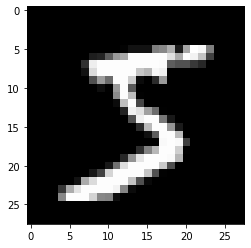

In [8]:
image,label = dataset[0]
plt.imshow(image,cmap='gray')
print("Label:",label)

Label: 2


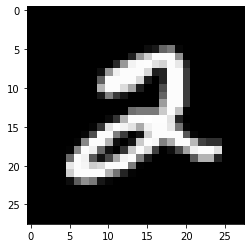

In [9]:
image,label = dataset[5]
plt.imshow(image,cmap='gray')
print("Label:",label)

In [10]:
import torchvision.transforms as transforms

In [11]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train

In [12]:
dataset= MNIST(root='data/',train=True,transform=transforms.ToTensor())
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [13]:
img_tensor,label=dataset[0]
print(img_tensor.shape,label)

torch.Size([1, 28, 28]) 5


In [14]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


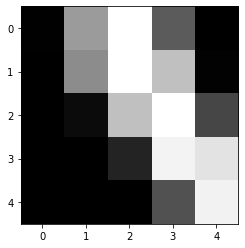

In [15]:
plt.imshow(img_tensor[0,10:15,10:15],cmap='gray')

In [16]:
from torch.utils.data import random_split,DataLoader

train_ds,val_ds= random_split(dataset,[50000,10000])
len(train_ds),len(val_ds)

(50000, 10000)

In [17]:
batch_size=128
train_loader= DataLoader(train_ds,batch_size,shuffle=True)
val_loader= DataLoader(val_ds,batch_size)

In [18]:
import torch.nn as nn

input_size=28*28
num_classes=10

model=nn.Linear(input_size,num_classes)

In [19]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0241,  0.0290,  0.0017,  ...,  0.0002,  0.0049,  0.0284],
        [ 0.0245,  0.0313, -0.0288,  ..., -0.0010,  0.0275,  0.0253],
        [ 0.0207, -0.0212,  0.0142,  ...,  0.0047, -0.0056, -0.0204],
        ...,
        [-0.0147, -0.0120,  0.0315,  ...,  0.0040, -0.0200,  0.0032],
        [-0.0266, -0.0255,  0.0075,  ...,  0.0016, -0.0035, -0.0270],
        [-0.0279, -0.0160, -0.0175,  ...,  0.0172,  0.0336,  0.0321]],
       requires_grad=True)

In [20]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0007, -0.0347,  0.0131, -0.0183, -0.0145,  0.0327, -0.0188,  0.0243,
        -0.0136,  0.0260], requires_grad=True)

In [21]:
for images,labels in train_loader:
    print(labels)
    print(images.shape)
    break

tensor([2, 2, 6, 8, 7, 9, 6, 8, 2, 3, 6, 5, 3, 1, 8, 1, 3, 2, 3, 3, 7, 7, 5, 8,
        3, 0, 2, 1, 5, 3, 9, 2, 3, 4, 5, 9, 6, 8, 2, 3, 1, 1, 6, 0, 5, 7, 4, 3,
        1, 6, 8, 9, 5, 7, 8, 2, 2, 2, 0, 9, 6, 3, 3, 1, 0, 9, 6, 7, 5, 7, 6, 1,
        9, 4, 9, 0, 4, 9, 3, 2, 4, 5, 3, 8, 1, 2, 8, 1, 1, 9, 6, 5, 6, 1, 3, 2,
        3, 9, 9, 6, 2, 8, 5, 5, 3, 6, 0, 4, 2, 8, 3, 6, 7, 2, 4, 7, 9, 5, 7, 1,
        7, 5, 4, 8, 5, 1, 7, 9])
torch.Size([128, 1, 28, 28])


In [22]:
images.shape

torch.Size([128, 1, 28, 28])

In [23]:
images.reshape(128,784).shape

torch.Size([128, 784])

In [24]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear= nn.Linear(input_size,num_classes)
    def forward(self,xb):
        xb=xb.reshape(-1,784)
        out=self.linear(xb)
        return out
model=MnistModel()

In [25]:
for images,labels in train_loader:
    print(images.shape)
    outputs=model(images)
    print(outputs.shape)
    break

print("Output shape: ",outputs.shape)
print("Output data: ",outputs.data[0])

torch.Size([128, 1, 28, 28])
torch.Size([128, 10])
Output shape:  torch.Size([128, 10])
Output data:  tensor([-0.2477, -0.0817, -0.0064,  0.0556, -0.0869, -0.1254, -0.1752, -0.0115,
        -0.2098,  0.1426])


In [26]:
import torch.nn.functional as F
outputs[:2]  # Softmax activation function.

tensor([[-0.2477, -0.0817, -0.0064,  0.0556, -0.0869, -0.1254, -0.1752, -0.0115,
         -0.2098,  0.1426],
        [-0.0901, -0.0736, -0.0858, -0.1012, -0.3806, -0.1113, -0.0007, -0.0609,
         -0.1264,  0.0812]], grad_fn=<SliceBackward0>)

In [27]:
probs=F.softmax(outputs,dim=1)
print("Samples probabilities",probs[:2].data)
print("Sum: ",torch.sum(probs[1]).item())

Samples probabilities tensor([[0.0835, 0.0986, 0.1063, 0.1131, 0.0981, 0.0944, 0.0898, 0.1058, 0.0868,
         0.1234],
        [0.0999, 0.1016, 0.1003, 0.0988, 0.0747, 0.0978, 0.1092, 0.1028, 0.0963,
         0.1186]])
Sum:  0.9999998807907104


In [28]:
max_probs,preds= torch.max(probs,dim=1)
print(max_probs)
print(max_probs.shape)
print(preds)

tensor([0.1234, 0.1186, 0.1155, 0.1567, 0.1258, 0.1177, 0.1303, 0.1396, 0.1252,
        0.1227, 0.1176, 0.1256, 0.1198, 0.1291, 0.1492, 0.1419, 0.1380, 0.1159,
        0.1193, 0.1370, 0.1340, 0.1528, 0.1343, 0.1362, 0.1141, 0.1359, 0.1098,
        0.1413, 0.1149, 0.1278, 0.1245, 0.1160, 0.1182, 0.1175, 0.1133, 0.1420,
        0.1360, 0.1202, 0.1340, 0.1496, 0.1475, 0.1144, 0.1315, 0.1126, 0.1139,
        0.1149, 0.1222, 0.1595, 0.1231, 0.1232, 0.1346, 0.1327, 0.1282, 0.1305,
        0.1212, 0.1135, 0.1320, 0.1161, 0.1211, 0.1337, 0.1195, 0.1459, 0.1180,
        0.1224, 0.1169, 0.1336, 0.1287, 0.1249, 0.1269, 0.1294, 0.1478, 0.1234,
        0.1344, 0.1275, 0.1319, 0.1310, 0.1330, 0.1272, 0.1161, 0.1403, 0.1236,
        0.1419, 0.1335, 0.1366, 0.1237, 0.1157, 0.1152, 0.1217, 0.1444, 0.1319,
        0.1360, 0.1248, 0.1459, 0.1301, 0.1234, 0.1054, 0.1174, 0.1164, 0.1460,
        0.1253, 0.1394, 0.1196, 0.1160, 0.1229, 0.1228, 0.1351, 0.1343, 0.1255,
        0.1184, 0.1245, 0.1274, 0.1262, 

In [29]:
labels

tensor([8, 3, 1, 5, 1, 0, 4, 4, 9, 2, 4, 4, 5, 0, 8, 6, 2, 8, 7, 4, 6, 6, 9, 0,
        1, 3, 1, 3, 3, 8, 5, 1, 1, 0, 5, 6, 0, 5, 9, 9, 3, 9, 3, 0, 2, 3, 3, 0,
        4, 4, 9, 9, 4, 7, 3, 2, 5, 3, 9, 7, 6, 2, 3, 3, 0, 5, 9, 5, 0, 5, 7, 8,
        3, 5, 5, 6, 2, 2, 3, 3, 8, 3, 4, 8, 5, 4, 1, 1, 2, 6, 9, 7, 8, 8, 9, 9,
        2, 7, 7, 4, 8, 8, 0, 8, 8, 4, 0, 9, 7, 1, 8, 5, 5, 4, 2, 7, 0, 1, 7, 1,
        0, 0, 1, 8, 0, 5, 2, 1])

In [30]:
outputs[:2]

tensor([[-0.2477, -0.0817, -0.0064,  0.0556, -0.0869, -0.1254, -0.1752, -0.0115,
         -0.2098,  0.1426],
        [-0.0901, -0.0736, -0.0858, -0.1012, -0.3806, -0.1113, -0.0007, -0.0609,
         -0.1264,  0.0812]], grad_fn=<SliceBackward0>)

In [31]:
torch.sum(preds==labels)

tensor(16)

In [32]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [33]:
accuracy(outputs,labels)

tensor(0.1250)

In [34]:
probs

tensor([[0.0835, 0.0986, 0.1063,  ..., 0.1058, 0.0868, 0.1234],
        [0.0999, 0.1016, 0.1003,  ..., 0.1028, 0.0963, 0.1186],
        [0.0881, 0.1063, 0.0918,  ..., 0.0979, 0.1045, 0.1000],
        ...,
        [0.0974, 0.1123, 0.0957,  ..., 0.1112, 0.0855, 0.1035],
        [0.0803, 0.1398, 0.1093,  ..., 0.1108, 0.0740, 0.1030],
        [0.1128, 0.0928, 0.0964,  ..., 0.0961, 0.0933, 0.1014]],
       grad_fn=<SoftmaxBackward0>)

In [35]:
outputs

tensor([[-0.2477, -0.0817, -0.0064,  ..., -0.0115, -0.2098,  0.1426],
        [-0.0901, -0.0736, -0.0858,  ..., -0.0609, -0.1264,  0.0812],
        [-0.1950, -0.0070, -0.1544,  ..., -0.0897, -0.0243, -0.0682],
        ...,
        [-0.0215,  0.1217, -0.0387,  ...,  0.1113, -0.1509,  0.0400],
        [-0.2915,  0.2628,  0.0164,  ...,  0.0303, -0.3735, -0.0425],
        [ 0.0789, -0.1158, -0.0780,  ..., -0.0806, -0.1110, -0.0269]],
       grad_fn=<AddmmBackward0>)

In [36]:
loss_fn=F.cross_entropy

In [37]:
loss=loss_fn(outputs,labels)
loss

tensor(2.3386, grad_fn=<NllLossBackward0>)

In [38]:
def evaluate(model,val_loader):
    outputs=[model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [39]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [40]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [41]:
result0=evaluate(model,val_loader)
result0

{'val_loss': 2.2958505153656006, 'val_acc': 0.10314477980136871}

In [42]:
history1=fit(20,0.001,model,train_loader,val_loader)


Epoch [0], val_loss: 1.9380, val_acc: 0.6198
Epoch [1], val_loss: 1.6725, val_acc: 0.7101
Epoch [2], val_loss: 1.4747, val_acc: 0.7486
Epoch [3], val_loss: 1.3255, val_acc: 0.7723
Epoch [4], val_loss: 1.2107, val_acc: 0.7864
Epoch [5], val_loss: 1.1205, val_acc: 0.7966
Epoch [6], val_loss: 1.0479, val_acc: 0.8058
Epoch [7], val_loss: 0.9883, val_acc: 0.8122
Epoch [8], val_loss: 0.9387, val_acc: 0.8186
Epoch [9], val_loss: 0.8967, val_acc: 0.8229
Epoch [10], val_loss: 0.8608, val_acc: 0.8267
Epoch [11], val_loss: 0.8295, val_acc: 0.8303
Epoch [12], val_loss: 0.8020, val_acc: 0.8334
Epoch [13], val_loss: 0.7778, val_acc: 0.8365
Epoch [14], val_loss: 0.7561, val_acc: 0.8390
Epoch [15], val_loss: 0.7367, val_acc: 0.8414
Epoch [16], val_loss: 0.7191, val_acc: 0.8440
Epoch [17], val_loss: 0.7031, val_acc: 0.8472
Epoch [18], val_loss: 0.6886, val_acc: 0.8488
Epoch [19], val_loss: 0.6753, val_acc: 0.8498


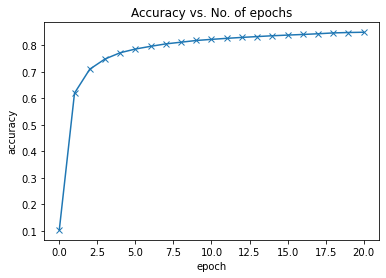

In [43]:
history = [result0] + history1
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [44]:
test_dataset=MNIST(root='data/',train=False,transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


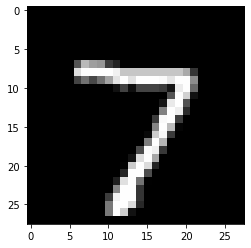

In [45]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [46]:
def predict_image(img,model):
    xb=img.unsqueeze(0)
    yb=model(xb)
    _,preds= torch.max(yb,dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


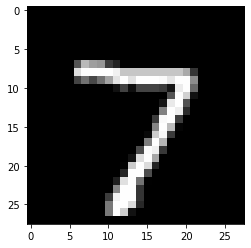

In [47]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


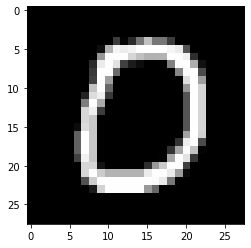

In [48]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 3


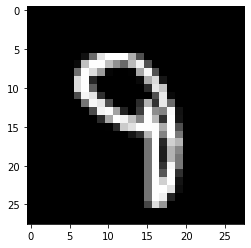

In [49]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [50]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6399775147438049, 'val_acc': 0.8592773675918579}